In [1]:
%pip install pyalex


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pyalex import Works
import pyalex
pyalex.config.email = "tarakomarecity@gmail.com"

flatten2 = lambda l: [item for sublist in l if sublist == sublist for item in sublist]

In [3]:
# コンセプトがinner earである論文を取得
pager = Works().filter(concepts={"id": "C2778500370"})\
            .select(["id", "title", "publication_year", "authorships", "referenced_works", "cited_by_count"]).paginate(per_page=200, n_max=None)

works_json = []
for page in pager:
    for item in page:
        works_json.append(item)
    print(len(works_json))


200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800
10000
10200
10400
10600
10800
11000
11200
11400
11600
11800
12000
12200
12400
12600
12800
13000
13200
13400
13600
13800
14000
14200
14400
14600
14800
15000
15200
15400
15600
15800
16000
16200
16400
16600
16800
17000
17200
17400
17600
17800
18000
18200
18400
18600
18800
19000
19200
19400
19600
19800
20000
20200
20400
20600
20800
21000
21200
21400
21600
21800
22000
22200
22400
22600
22800
23000
23200
23400
23600
23800
24000
24200
24400
24600
24800
25000
25200
25400
25600
25800
26000
26200
26400
26600
26800
27000
27200
27400
27600
27800
28000
28200
28400
28600
28739
28739


In [4]:
years = pd.Series(
    {work['id']: work['publication_year'] for work in works_json},
    name='year'
)
years.index.name = 'eid'

cited_counts = pd.Series(
    {work['id']: work['cited_by_count'] for work in works_json},
    name='cited_count'
)
cited_counts.index.name = 'eid'

ref_counts = pd.Series(
    {work['id']: len(work['referenced_works']) for work in works_json},
    name='ref_count'
)
ref_counts.index.name = 'eid'

citations_data = []
for work in works_json:
    target_id = work['id']
    for referenced_work in work['referenced_works']:
        citations_data.append({'source': referenced_work, 'target': target_id})
citations_df = pd.DataFrame(citations_data)

team_sizes = pd.Series(
    {work['id']: len(work['authorships']) for work in works_json},
    name='team_size'
)
team_sizes.index.name = 'eid'

display(years, cited_counts, ref_counts, citations_df, team_sizes)

eid
https://openalex.org/W2097498366    2009
https://openalex.org/W2074276238    1985
https://openalex.org/W2137453923    2001
https://openalex.org/W2038717281    2000
https://openalex.org/W2156733405    2006
                                    ... 
https://openalex.org/W4233483408    1993
https://openalex.org/W4236113123    1993
https://openalex.org/W4252519784    1993
https://openalex.org/W632610015     1993
https://openalex.org/W642361344     1993
Name: year, Length: 28738, dtype: int64

eid
https://openalex.org/W2097498366    1958
https://openalex.org/W2074276238    1683
https://openalex.org/W2137453923    1279
https://openalex.org/W2038717281    1159
https://openalex.org/W2156733405    1152
                                    ... 
https://openalex.org/W4233483408       0
https://openalex.org/W4236113123       0
https://openalex.org/W4252519784       0
https://openalex.org/W632610015        0
https://openalex.org/W642361344        0
Name: cited_count, Length: 28738, dtype: int64

eid
https://openalex.org/W2097498366     43
https://openalex.org/W2074276238     12
https://openalex.org/W2137453923    352
https://openalex.org/W2038717281     40
https://openalex.org/W2156733405     49
                                   ... 
https://openalex.org/W4233483408      0
https://openalex.org/W4236113123      0
https://openalex.org/W4252519784     15
https://openalex.org/W632610015       0
https://openalex.org/W642361344       0
Name: ref_count, Length: 28738, dtype: int64

,source,target
0,https://openalex.org/W1512539296,https://openalex.org/W2097498366
1,https://openalex.org/W1553093690,https://openalex.org/W2097498366
2,https://openalex.org/W1971214343,https://openalex.org/W2097498366
3,https://openalex.org/W1974757226,https://openalex.org/W2097498366
4,https://openalex.org/W1975794556,https://openalex.org/W2097498366
...,...,...
641036,https://openalex.org/W2068719737,https://openalex.org/W4252519784
641037,https://openalex.org/W2069843894,https://openalex.org/W4252519784
641038,https://openalex.org/W2147465502,https://openalex.org/W4252519784
641039,https://openalex.org/W2155241822,https://openalex.org/W4252519784


eid
https://openalex.org/W2097498366    2
https://openalex.org/W2074276238    4
https://openalex.org/W2137453923    2
https://openalex.org/W2038717281    6
https://openalex.org/W2156733405    7
                                   ..
https://openalex.org/W4233483408    0
https://openalex.org/W4236113123    3
https://openalex.org/W4252519784    1
https://openalex.org/W632610015     1
https://openalex.org/W642361344     1
Name: team_size, Length: 28738, dtype: int64

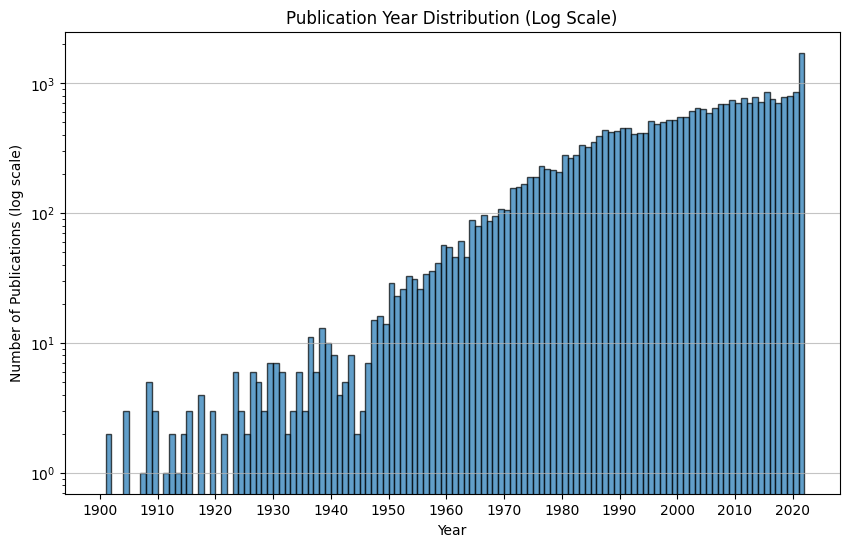

In [5]:
# yearsのヒストグラムの作成
plt.figure(figsize=(10, 6))
plt.hist(years, bins=range(1900, 2023), edgecolor='black', alpha=0.7, log=True)
plt.title("Publication Year Distribution (Log Scale)")
plt.xlabel("Year")
plt.ylabel("Number of Publications (log scale)")
plt.xticks(range(1900, 2023, 10))
plt.grid(axis='y', alpha=0.75)

# ヒストグラムの表示
plt.show()

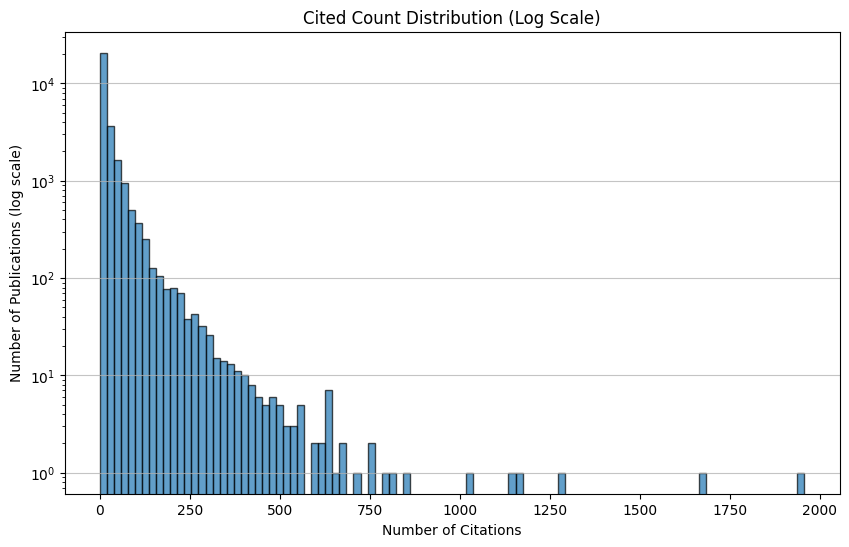

In [6]:
# cited_countsのヒストグラムの作成
plt.figure(figsize=(10, 6))
plt.hist(cited_counts, bins=100, edgecolor='black', alpha=0.7, log=True)
plt.title("Cited Count Distribution (Log Scale)")
plt.xlabel("Number of Citations")
plt.ylabel("Number of Publications (log scale)")
plt.grid(axis='y', alpha=0.75)

# ヒストグラムの表示
plt.show()

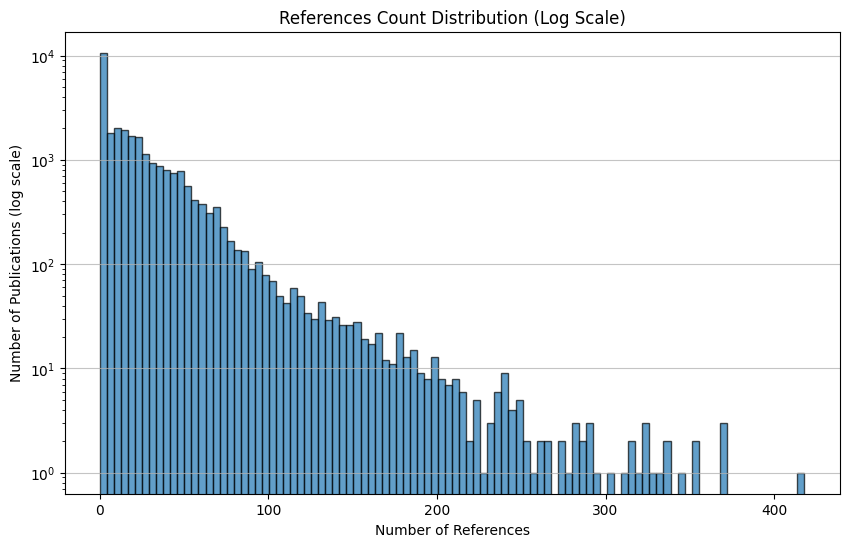

In [7]:
# ref_countsのヒストグラムの作成
plt.figure(figsize=(10, 6))
plt.hist(ref_counts, bins=100, edgecolor='black', alpha=0.7, log=True)
plt.title("References Count Distribution (Log Scale)")
plt.xlabel("Number of References")
plt.ylabel("Number of Publications (log scale)")
plt.grid(axis='y', alpha=0.75)

# ヒストグラムの表示
plt.show()

In [8]:
def citation_groupby(df_citation):
    '''source,targetのDataFrameを引用先，引用元ごとにgroupby
    
    input: source,targetをcolumnにもつedgeのDataFrame

    index: eid
    source: indexが引用先となる論文群(新)
    target: indexが引用元となる論文群(旧)
    '''
    
    citations_source_gp = df_citation.groupby('source').agg(list)
    citations_target_gp = df_citation.groupby('target').agg(list)
    df_citation_gp = pd.concat([citations_source_gp,citations_target_gp],axis = 1)
    return df_citation_gp

citations_gb = citation_groupby(citations_df)
citations_gb

,target,source
https://openalex.org/W1000002278,[https://openalex.org/W4381330543],NaN
https://openalex.org/W100176828,[https://openalex.org/W162484059],NaN
https://openalex.org/W1002468010,[https://openalex.org/W5064551],NaN
https://openalex.org/W100275796,"[https://openalex.org/W2113974709, https://ope...",NaN
https://openalex.org/W1002761387,[https://openalex.org/W2091554009],NaN
...,...,...
https://openalex.org/W979213523,NaN,"[https://openalex.org/W1752836832, https://ope..."
https://openalex.org/W980619165,NaN,"[https://openalex.org/W28540722, https://opena..."
https://openalex.org/W982842117,NaN,"[https://openalex.org/W185544521, https://open..."
https://openalex.org/W987910939,NaN,"[https://openalex.org/W1182126100, https://ope..."


In [9]:
citations_gb['year'] = citations_gb.index.map(years)
citations_gb

,target,source,year
https://openalex.org/W1000002278,[https://openalex.org/W4381330543],NaN,NaN
https://openalex.org/W100176828,[https://openalex.org/W162484059],NaN,NaN
https://openalex.org/W1002468010,[https://openalex.org/W5064551],NaN,NaN
https://openalex.org/W100275796,"[https://openalex.org/W2113974709, https://ope...",NaN,NaN
https://openalex.org/W1002761387,[https://openalex.org/W2091554009],NaN,NaN
...,...,...,...
https://openalex.org/W979213523,NaN,"[https://openalex.org/W1752836832, https://ope...",2015.0
https://openalex.org/W980619165,NaN,"[https://openalex.org/W28540722, https://opena...",1989.0
https://openalex.org/W982842117,NaN,"[https://openalex.org/W185544521, https://open...",2015.0
https://openalex.org/W987910939,NaN,"[https://openalex.org/W1182126100, https://ope...",2005.0


In [10]:
def get_score(node):
    try:
        node_r = set(citations_gb.target.loc[node])
        node_r_c = set(flatten2([citations_gb.source.loc[x] for x in node_r])) - set([node])
        node_c = set(citations_gb.source.loc[node])
        allnodes = node_c | node_r_c
        cite_target = node_c - node_r_c
        cite_targetref = node_r_c - node_c
        cite_target_targetref_both = node_r_c & node_c
        score = (len(cite_target)*1 + len(cite_target_targetref_both)*-1 + len(cite_targetref)*0)/len(allnodes)
        return score
    except:
        return None

In [11]:
eids = citations_gb.index

res = []
for eid in eids:
    res.append(get_score(eid))
scores = pd.DataFrame([[eid,re] for eid,re in zip(eids,res)])

scores.index = scores[0]
scores['team_size'] = scores[0].map(team_sizes)
display(scores)

,0,1,team_size
0,,,
https://openalex.org/W1000002278,https://openalex.org/W1000002278,NaN,NaN
https://openalex.org/W100176828,https://openalex.org/W100176828,NaN,NaN
https://openalex.org/W1002468010,https://openalex.org/W1002468010,NaN,NaN
https://openalex.org/W100275796,https://openalex.org/W100275796,NaN,NaN
https://openalex.org/W1002761387,https://openalex.org/W1002761387,NaN,NaN
...,...,...,...
https://openalex.org/W979213523,https://openalex.org/W979213523,NaN,5.0
https://openalex.org/W980619165,https://openalex.org/W980619165,NaN,2.0
https://openalex.org/W982842117,https://openalex.org/W982842117,NaN,3.0


In [12]:
scores_notna = scores[scores[1].notna() & scores['team_size'].notna()].drop(columns=0)
scores_notna

,1,team_size
0,,
https://openalex.org/W1008510935,-0.041096,2.0
https://openalex.org/W100914941,0.057279,2.0
https://openalex.org/W1014149811,-0.076023,5.0
https://openalex.org/W101668699,0.412121,2.0
https://openalex.org/W1022720170,-0.030769,3.0
...,...,...
https://openalex.org/W986875310,0.000000,1.0
https://openalex.org/W987089854,0.447619,2.0
https://openalex.org/W987579938,0.036765,1.0


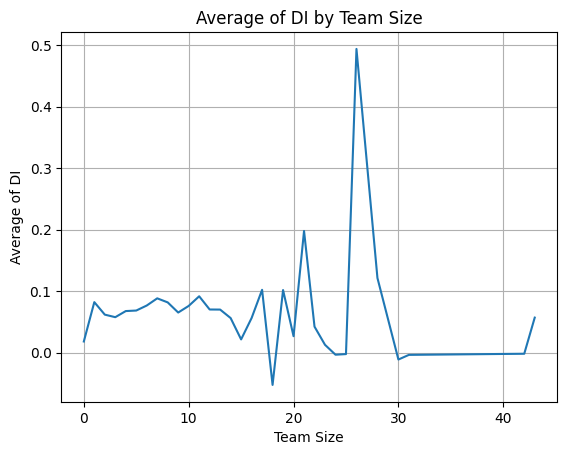

In [13]:
# team_sizeごとにグループ化
grouped_df = scores_notna.groupby('team_size').mean()

# グラフの描画
plt.plot(grouped_df.index, grouped_df[1])
plt.xlabel('Team Size')
plt.ylabel('Average of DI')
plt.title('Average of DI by Team Size')
plt.grid(True)
plt.show()

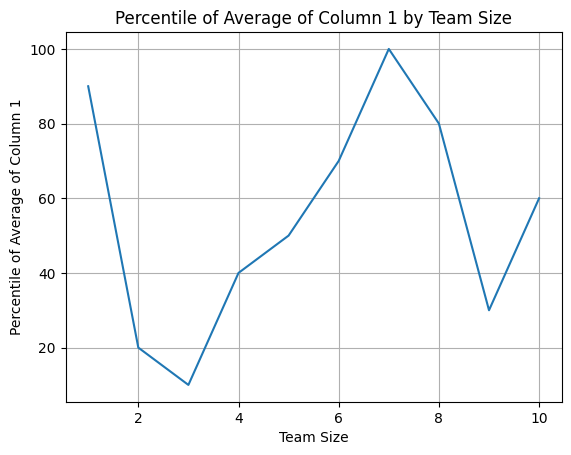

In [14]:
# team_sizeが1から10までのデータを抽出
filtered_df = scores_notna[scores_notna['team_size'].between(1, 10)]

# team_sizeごとにグループ化し、1というカラムの平均値を計算
grouped_df = filtered_df.groupby('team_size').mean()

# 全体の平均値のパーセンタイルを計算
percentiles = grouped_df.rank(pct=True) * 100

# グラフの描画
plt.plot(percentiles.index, percentiles[1])
plt.xlabel('Team Size')
plt.ylabel('Percentile of Average of Column 1')
plt.title('Percentile of Average of Column 1 by Team Size')
plt.grid(True)
plt.show()


In [15]:
scores_notna['year'] = years
scores_notna['cited_count'] = cited_counts
scores_notna['ref_count'] = ref_counts
scores_notna

,1,team_size,year,cited_count,ref_count
0,,,,,
https://openalex.org/W1008510935,-0.041096,2.0,1989,6,11
https://openalex.org/W100914941,0.057279,2.0,1980,29,52
https://openalex.org/W1014149811,-0.076023,5.0,2016,13,25
https://openalex.org/W101668699,0.412121,2.0,1974,9,78
https://openalex.org/W1022720170,-0.030769,3.0,2012,4,6
...,...,...,...,...,...
https://openalex.org/W986875310,0.000000,1.0,1990,1,60
https://openalex.org/W987089854,0.447619,2.0,1975,10,57
https://openalex.org/W987579938,0.036765,1.0,1993,13,38


In [16]:
scores_filtered = scores_notna[(scores_notna['year'] < 2018) & (scores_notna['cited_count'] > 10) & (scores_notna['ref_count'] > 10)]
scores_filtered

,1,team_size,year,cited_count,ref_count
0,,,,,
https://openalex.org/W100914941,0.057279,2.0,1980,29,52
https://openalex.org/W1014149811,-0.076023,5.0,2016,13,25
https://openalex.org/W10342097,0.789474,4.0,1996,20,150
https://openalex.org/W1041949055,-0.044355,2.0,1999,52,37
https://openalex.org/W1047238016,-0.032537,6.0,2015,122,174
...,...,...,...,...,...
https://openalex.org/W972239990,0.031008,5.0,2015,24,30
https://openalex.org/W974144396,-0.010618,2.0,2015,30,199
https://openalex.org/W98158316,0.108108,6.0,2002,22,18


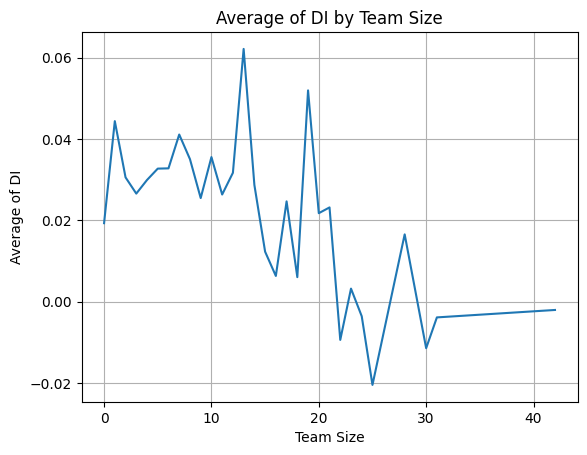

In [17]:
# team_sizeごとにグループ化
grouped_df = scores_filtered.groupby('team_size').mean()

# グラフの描画
plt.plot(grouped_df.index, grouped_df[1])
plt.xlabel('Team Size')
plt.ylabel('Average of DI')
plt.title('Average of DI by Team Size')
plt.grid(True)
plt.show()

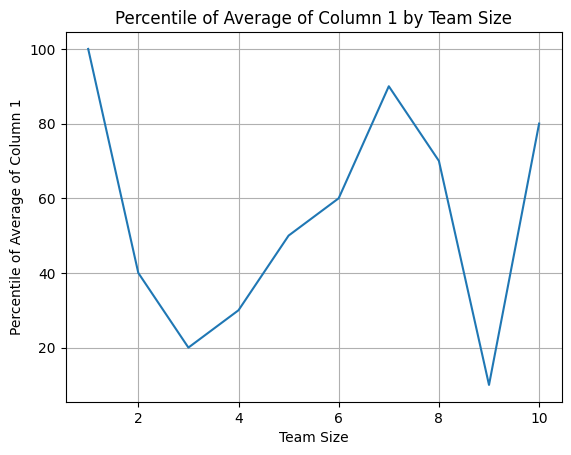

In [18]:
# team_sizeが1から10までのデータを抽出
filtered_df = scores_filtered[scores_filtered['team_size'].between(1, 10)]

# team_sizeごとにグループ化し、1というカラムの平均値を計算
grouped_df = filtered_df.groupby('team_size').mean()

# 全体の平均値のパーセンタイルを計算
percentiles = grouped_df.rank(pct=True) * 100

# グラフの描画
plt.plot(percentiles.index, percentiles[1])
plt.xlabel('Team Size')
plt.ylabel('Percentile of Average of Column 1')
plt.title('Percentile of Average of Column 1 by Team Size')
plt.grid(True)
plt.show()